<a href="https://colab.research.google.com/github/JawadAhmadCS/Notebooks/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Upload Dataset

In [2]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


# Define Neural Network Class

In [3]:
class NeuralNetwork:
    """
    Neural Network implementation from scratch
    Architecture: 30 -> 16 -> 8 -> 1
    """

    def __init__(self, input_size=30, hidden1=16, hidden2=8, learning_rate=0.01):
        # Xavier initialization
        self.lr = learning_rate

        # Layer 1: Input to Hidden1 (30 -> 16)
        self.W1 = np.random.randn(hidden1, input_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((hidden1, 1))

        # Layer 2: Hidden1 to Hidden2 (16 -> 8)
        self.W2 = np.random.randn(hidden2, hidden1) * np.sqrt(2.0 / hidden1)
        self.b2 = np.zeros((hidden2, 1))

        # Layer 3: Hidden2 to Output (8 -> 1)
        self.W3 = np.random.randn(1, hidden2) * np.sqrt(2.0 / hidden2)
        self.b3 = np.zeros((1, 1))

        self.cache = {}

    def relu(self, Z):
        """ReLU activation: max(0, z)"""
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        """Derivative of ReLU"""
        return (Z > 0).astype(float)

    def sigmoid(self, Z):
        """Sigmoid activation: 1 / (1 + e^-z)"""
        return 1 / (1 + np.exp(-np.clip(Z, -500, 500)))

    def sigmoid_derivative(self, A):
        """Derivative of sigmoid"""
        return A * (1 - A)

    def forward(self, X):
        """Forward propagation"""
        # Layer 1
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.relu(Z1)

        # Layer 2
        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = self.relu(Z2)

        # Layer 3 (Output)
        Z3 = np.dot(self.W3, A2) + self.b3
        A3 = self.sigmoid(Z3)

        # Cache for backpropagation
        self.cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2, 'Z3': Z3, 'A3': A3, 'X': X}

        return A3

    def compute_loss(self, A3, Y):
        """Binary Cross-Entropy Loss"""
        m = Y.shape[1]
        epsilon = 1e-8
        loss = -np.mean(Y * np.log(A3 + epsilon) + (1 - Y) * np.log(1 - A3 + epsilon))
        return loss

    def backward(self, Y):
        """Backpropagation using chain rule"""
        m = Y.shape[1]

        A3 = self.cache['A3']
        A2 = self.cache['A2']
        A1 = self.cache['A1']
        Z2 = self.cache['Z2']
        Z1 = self.cache['Z1']
        X = self.cache['X']

        # Output layer gradients
        dZ3 = A3 - Y
        dW3 = (1/m) * np.dot(dZ3, A2.T)
        db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

        # Hidden layer 2 gradients
        dA2 = np.dot(self.W3.T, dZ3)
        dZ2 = dA2 * self.relu_derivative(Z2)
        dW2 = (1/m) * np.dot(dZ2, A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        # Hidden layer 1 gradients
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * self.relu_derivative(Z1)
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        self.grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2,
                      'dW3': dW3, 'db3': db3}

    def update_parameters(self):
        """Gradient descent parameter update"""
        self.W1 -= self.lr * self.grads['dW1']
        self.b1 -= self.lr * self.grads['db1']
        self.W2 -= self.lr * self.grads['dW2']
        self.b2 -= self.lr * self.grads['db2']
        self.W3 -= self.lr * self.grads['dW3']
        self.b3 -= self.lr * self.grads['db3']

    def train_step(self, X, Y):
        """Single training iteration"""
        A3 = self.forward(X)
        loss = self.compute_loss(A3, Y)
        self.backward(Y)
        self.update_parameters()
        return loss

    def predict(self, X):
        """Make predictions"""
        A3 = self.forward(X)
        return (A3 > 0.5).astype(int)

print("✓ Neural Network class defined")

✓ Neural Network class defined


# Data Preprocessing Functions

In [4]:
def manual_train_test_split(X, y, test_size=0.2, random_state=42):
    """Manual train-test split"""
    np.random.seed(random_state)
    n_samples = X.shape[0]
    n_test = int(n_samples * test_size)

    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]


def manual_normalize(X_train, X_test):
    """Z-score normalization"""
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0) + 1e-8

    X_train_norm = (X_train - mean) / std
    X_test_norm = (X_test - mean) / std

    return X_train_norm, X_test_norm


def manual_k_fold_split(X, y, k=5, random_state=42):
    """K-fold cross-validation splits"""
    np.random.seed(random_state)
    n_samples = X.shape[0]
    indices = np.random.permutation(n_samples)
    fold_size = n_samples // k

    folds = []
    for i in range(k):
        start = i * fold_size
        end = start + fold_size if i < k-1 else n_samples
        val_idx = indices[start:end]
        train_idx = np.concatenate([indices[:start], indices[end:]])
        folds.append((train_idx, val_idx))

    return folds


def confusion_matrix_manual(y_true, y_pred):
    """Compute confusion matrix"""
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN


def compute_metrics(y_true, y_pred):
    """Compute classification metrics"""
    TP, TN, FP, FN = confusion_matrix_manual(y_true, y_pred)

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': (TP, TN, FP, FN)
    }

print("✓ Helper functions defined")

✓ Helper functions defined


# Load and Prepare Data

In [6]:
# Load data
data = pd.read_csv('breast-cancer.csv')

# Prepare features and labels
X = data.drop(columns=['id', 'diagnosis'], axis=1).values.T  # (30, n)
y = (data['diagnosis'] == 'M').astype(int).values.reshape(1, -1)  # (1, n)

print(f"Total samples: {X.shape[1]}")
print(f"Features per sample: {X.shape[0]}")
print(f"Malignant cases: {np.sum(y)}")
print(f"Benign cases: {X.shape[1] - np.sum(y)}")
print(f"Class balance: {np.sum(y)/X.shape[1]*100:.1f}% malignant")

Total samples: 569
Features per sample: 30
Malignant cases: 212
Benign cases: 357
Class balance: 37.3% malignant


# Split and Normalize Data

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = manual_train_test_split(
    X.T, y.T, test_size=0.2, random_state=42
)

# Normalize
X_train_norm, X_test_norm = manual_normalize(X_train, X_test)

# Transpose for network (features, samples)
X_train_norm = X_train_norm.T
X_test_norm = X_test_norm.T
y_train = y_train.T
y_test = y_test.T

# Further split training into train/validation
X_tr, X_val, y_tr, y_val = manual_train_test_split(
    X_train_norm.T, y_train.T, test_size=0.2, random_state=42
)
X_tr, X_val = X_tr.T, X_val.T
y_tr, y_val = y_tr.T, y_val.T

print(f"Training samples: {X_tr.shape[1]}")
print(f"Validation samples: {X_val.shape[1]}")
print(f"Test samples: {X_test_norm.shape[1]}")

Training samples: 365
Validation samples: 91
Test samples: 113


# Train Model

In [9]:
# Initialize and train model
model = NeuralNetwork(input_size=30, learning_rate=0.1)

print("="*70)
print("TRAINING NEURAL NETWORK")
print("="*70)

epochs = 200
history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

for epoch in range(epochs):
    # Training step
    train_loss = model.train_step(X_tr, y_tr)

    # Evaluate
    train_pred = model.predict(X_tr)
    val_pred = model.predict(X_val)

    train_acc = np.mean(train_pred == y_tr)
    val_acc = np.mean(val_pred == y_val)

    val_loss = model.compute_loss(model.forward(X_val), y_val)

    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {train_loss:.4f}, "
              f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

print("\n✓ Training completed!")

TRAINING NEURAL NETWORK
Epoch 20/200 - Loss: 0.2877, Train Acc: 0.9288, Val Acc: 0.9011
Epoch 40/200 - Loss: 0.1896, Train Acc: 0.9397, Val Acc: 0.9231
Epoch 60/200 - Loss: 0.1516, Train Acc: 0.9507, Val Acc: 0.9231
Epoch 80/200 - Loss: 0.1274, Train Acc: 0.9562, Val Acc: 0.9341
Epoch 100/200 - Loss: 0.1093, Train Acc: 0.9616, Val Acc: 0.9341
Epoch 120/200 - Loss: 0.0955, Train Acc: 0.9699, Val Acc: 0.9560
Epoch 140/200 - Loss: 0.0859, Train Acc: 0.9753, Val Acc: 0.9560
Epoch 160/200 - Loss: 0.0777, Train Acc: 0.9753, Val Acc: 0.9670
Epoch 180/200 - Loss: 0.0714, Train Acc: 0.9781, Val Acc: 0.9670
Epoch 200/200 - Loss: 0.0648, Train Acc: 0.9781, Val Acc: 0.9780

✓ Training completed!


# Evaluate on Test Set

In [10]:
# Test set evaluation
y_test_pred = model.predict(X_test_norm)
test_metrics = compute_metrics(y_test.flatten(), y_test_pred.flatten())

print(f"Accuracy:  {test_metrics['accuracy']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall:    {test_metrics['recall']:.4f}")
print(f"F1 Score:  {test_metrics['f1_score']:.4f}")

TP, TN, FP, FN = test_metrics['confusion_matrix']
print(f"\nConfusion Matrix:")
print(f"  True Positives (TP):  {TP}")
print(f"  True Negatives (TN):  {TN}")
print(f"  False Positives (FP): {FP}")
print(f"  False Negatives (FN): {FN}")

Accuracy:  0.9646
Precision: 0.9524
Recall:    0.9524
F1 Score:  0.9524

Confusion Matrix:
  True Positives (TP):  40
  True Negatives (TN):  69
  False Positives (FP): 2
  False Negatives (FN): 2


# K-Fold Cross-Validation

In [11]:
k = 5
folds = manual_k_fold_split(X_train_norm.T, y_train.T, k=k, random_state=42)

cv_scores = []
for fold_idx, (train_idx, val_idx) in enumerate(folds):
    X_fold_train = X_train_norm.T[train_idx].T
    y_fold_train = y_train.T[train_idx].T
    X_fold_val = X_train_norm.T[val_idx].T
    y_fold_val = y_train.T[val_idx].T

    fold_model = NeuralNetwork(input_size=30, learning_rate=0.1)

    # Train for 100 epochs
    for _ in range(100):
        fold_model.train_step(X_fold_train, y_fold_train)

    # Evaluate
    y_fold_pred = fold_model.predict(X_fold_val)
    fold_acc = np.mean(y_fold_pred == y_fold_val)
    cv_scores.append(fold_acc)
    print(f"Fold {fold_idx + 1}/{k}: Accuracy = {fold_acc:.4f}")

mean_cv = np.mean(cv_scores)
std_cv = np.std(cv_scores)
print(f"\nMean Accuracy: {mean_cv:.4f} ± {std_cv:.4f}")
print(f"95% CI: [{mean_cv - 1.96*std_cv:.4f}, {mean_cv + 1.96*std_cv:.4f}]")

Fold 1/5: Accuracy = 0.9341
Fold 2/5: Accuracy = 0.9890
Fold 3/5: Accuracy = 0.9341
Fold 4/5: Accuracy = 0.9451
Fold 5/5: Accuracy = 0.9891

Mean Accuracy: 0.9583 ± 0.0255
95% CI: [0.9083, 1.0082]


# Plot & Visualition

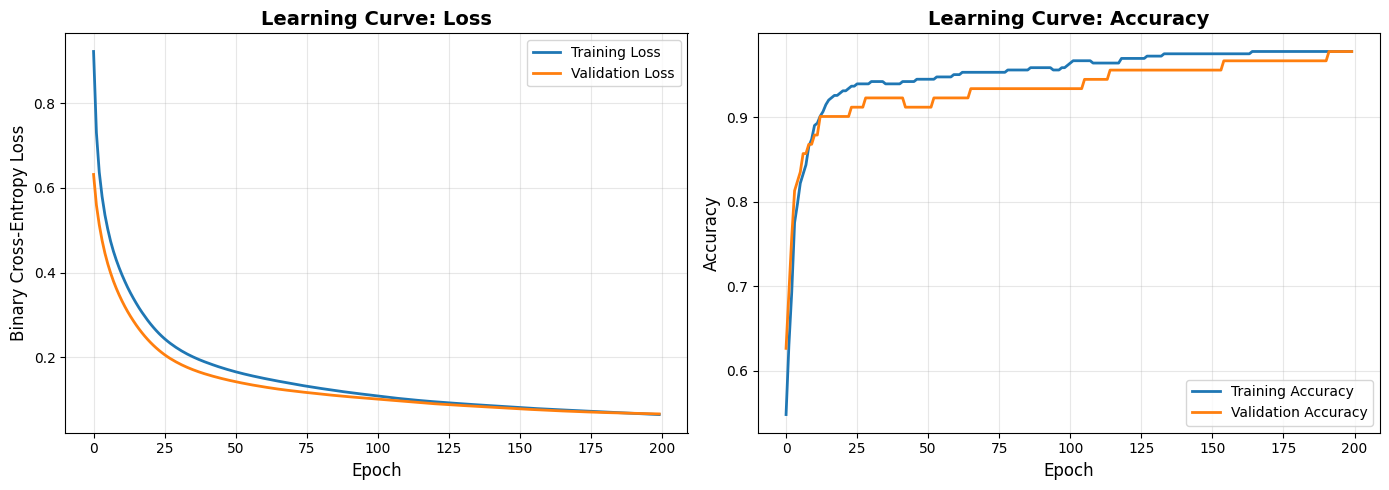

In [12]:
# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curves
axes[0].plot(history['train_loss'], label='Training Loss', linewidth=2)
axes[0].plot(history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Binary Cross-Entropy Loss', fontsize=12)
axes[0].set_title('Learning Curve: Loss', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy curves
axes[1].plot(history['train_acc'], label='Training Accuracy', linewidth=2)
axes[1].plot(history['val_acc'], label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Learning Curve: Accuracy', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

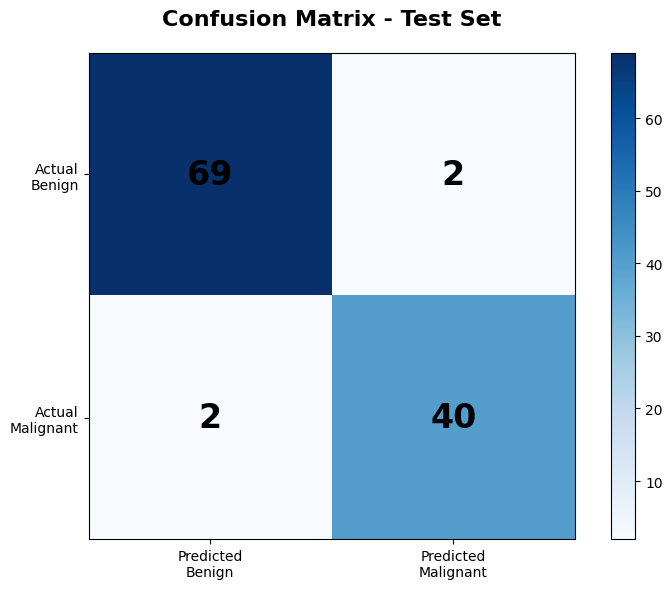

In [13]:
# Confusion matrix visualization
fig, ax = plt.subplots(figsize=(8, 6))
cm_display = np.array([[TN, FP], [FN, TP]])
im = ax.imshow(cm_display, cmap='Blues')

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Predicted\nBenign', 'Predicted\nMalignant'])
ax.set_yticklabels(['Actual\nBenign', 'Actual\nMalignant'])

# Add text annotations
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_display[i, j],
               ha="center", va="center", fontsize=24, fontweight='bold')

ax.set_title('Confusion Matrix - Test Set', fontsize=16, fontweight='bold', pad=20)
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

# BUILDING A PREDICTIVE SYSTEM

In [27]:
def predict_input(input_tuple, model, X_train):
    """
    Predict using our scratch-built neural network.
    Model outputs only 0/1, not probabilities.
    """
    # Convert to numpy array (1,30)
    input_array = np.asarray(input_tuple).reshape(1, -1)

    # Normalize using training set stats
    input_norm = (input_array - np.mean(X_train, axis=0)) / (np.std(X_train, axis=0) + 1e-8)

    # Transpose for NN input (30,1)
    input_norm = input_norm.T

    # Predict → gives [[0]] or [[1]]
    prediction = model.predict(input_norm)
    pred_class = int(prediction[0][0])

    # Map to label
    label = "Benign" if pred_class == 0 else "Malignant"
    print("Raw prediction:", prediction)  # debug print (human style)
    print(f"Predicted class index: {pred_class}")
    return label


In [30]:
# test 1
input1 = (11.71,16.67,74.72,423.6,0.1051,0.06095,0.03592,0.026,0.1339,0.05945,
          0.4489,2.508,3.258,34.37,0.006578,0.0138,0.02662,0.01307,0.01359,
          0.003707,13.33,25.48,86.16,546.7,0.1271,0.1028,0.1046,0.06968,
          0.1712,0.07343)

# test 2
input2 = (20.29,14.34,135.1,1297.0,0.1003,0.1328,0.1980,0.1043,0.1809,0.05883,
          0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,
          0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,
          0.2364,0.07678)

# test 3
input3 = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,
          0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.01980,
          0.0023,15.11,19.26,99.7,711.2,0.1440,0.1773,0.2390,0.1288,
          0.2977,0.07259)

input4 = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)


print("Prediction 1:", predict_input(input1, model, X_train))
print("Prediction 2:", predict_input(input2, model, X_train))
print("Prediction 3:", predict_input(input3, model, X_train))
print("Prediction 4:", predict_input(input4, model, X_train))


Raw prediction: [[0]]
Predicted class index: 0
Prediction 1: Benign
Raw prediction: [[1]]
Predicted class index: 1
Prediction 2: Malignant
Raw prediction: [[0]]
Predicted class index: 0
Prediction 3: Benign
Raw prediction: [[1]]
Predicted class index: 1
Prediction 4: Malignant
